### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.impute import KNNImputer #Impute values based on highly correlated features
from sklearn.impute import SimpleImputer #For imputing with median/mean

In [89]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LassoCV

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### Exploring Train Dataset

In [5]:
# Functional Brain Imaging Data
data_tfcm = pd.read_csv("train//TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv")
data_tfcm.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [6]:
# Checking for Null Values
null_counts = data_tfcm.isnull().sum()
null_counts = null_counts[null_counts>0]
print(null_counts)

Series([], dtype: int64)


- There are no NULL values in the MRI scan data

In [7]:
# Quantitative Data
data_quant = pd.read_excel("train/TRAIN_QUANTITATIVE_METADATA.xlsx",sheet_name="training_combined")
data_quant.sample(n=5)

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
1079,HHnb2caHyB0s,33.35,14,3,12,46,19,16,27,0,0,0,0,0,0,0,0,10,7.916951
195,obNscdNnwnpw,-37.80,14,3,17,43,19,15,28,4,23,9,13,6,9,10,1,5,7.568674
106,BvmqxcdVaFnh,80.00,14,3,8,29,23,11,24,3,18,2,13,9,10,5,3,9,8.181953
990,4N4Q1eYler0U,93.34,14,3,13,46,24,10,29,0,2,0,2,0,2,0,0,10,NaN
349,hzTTvFU8eCBH,86.67,14,3,13,44,20,17,26,6,11,0,11,3,5,0,0,6,9.453000


In [8]:
# Size
data_quant.shape

(1213, 19)

In [9]:
# Info
data_quant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1213 non-null   float64
 2   ColorVision_CV_Score        1213 non-null   int64  
 3   APQ_P_APQ_P_CP              1213 non-null   int64  
 4   APQ_P_APQ_P_ID              1213 non-null   int64  
 5   APQ_P_APQ_P_INV             1213 non-null   int64  
 6   APQ_P_APQ_P_OPD             1213 non-null   int64  
 7   APQ_P_APQ_P_PM              1213 non-null   int64  
 8   APQ_P_APQ_P_PP              1213 non-null   int64  
 9   SDQ_SDQ_Conduct_Problems    1213 non-null   int64  
 10  SDQ_SDQ_Difficulties_Total  1213 non-null   int64  
 11  SDQ_SDQ_Emotional_Problems  1213 non-null   int64  
 12  SDQ_SDQ_Externalizing       1213 non-null   int64  
 13  SDQ_SDQ_Generating_Impact   1213 

<b> Univariate Analysis </b>

In [10]:
# Descriptive Analysis
data_quant.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,853.000000
mean,58.876917,13.164880,3.781533,13.205276,39.374279,17.785655,16.393240,25.246496,2.059357,12.122836,2.307502,7.557296,4.073372,5.497939,4.565540,2.258038,7.683430,11.245678
std,49.855501,2.780624,1.376700,3.811772,6.245928,3.764112,5.376994,3.950529,2.023322,6.577207,2.167549,4.166627,2.819731,2.836764,3.519634,2.090414,2.190295,3.234372
min,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.600000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,1.000000,4.000000,2.000000,4.000000,2.000000,0.000000,6.000000,8.803901
50%,76.670000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,2.000000,12.000000,2.000000,7.000000,4.000000,6.000000,4.000000,2.000000,8.000000,10.739219
75%,93.400000,14.000000,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,3.000000,17.000000,4.000000,10.000000,6.000000,8.000000,7.000000,4.000000,10.000000,13.460871
max,100.000000,14.000000,12.000000,28.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,10.000000,20.000000,10.000000,10.000000,17.000000,9.000000,10.000000,21.564453


<Axes: xlabel='EHQ_EHQ_Total', ylabel='Count'>

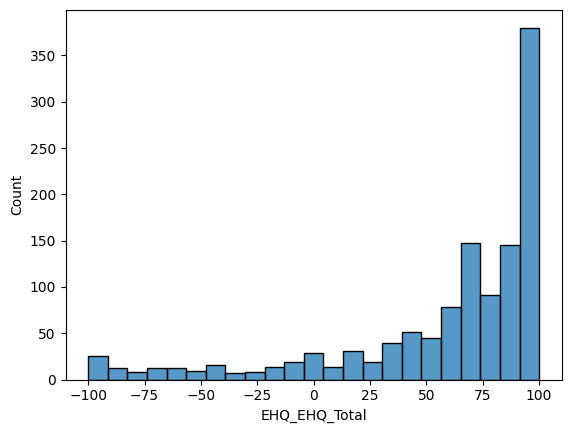

In [11]:
# Distribution of EHQ_EHQ
sns.histplot(data_quant['EHQ_EHQ_Total'])

<Axes: xlabel='ColorVision_CV_Score', ylabel='Count'>

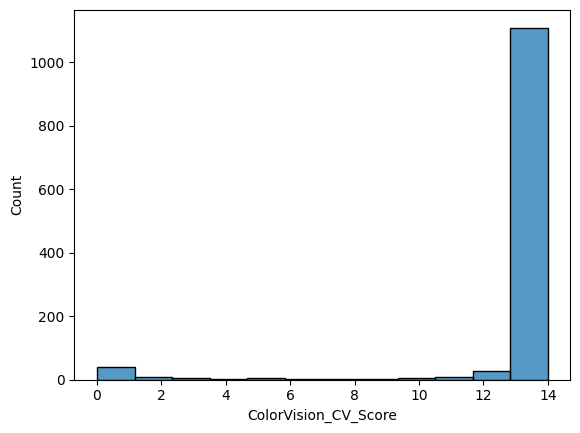

In [12]:
# Distribution of Colorvision Score
sns.histplot(data_quant['ColorVision_CV_Score'])

<font color='red'> <b>Red-green color vision defect (Red-Green Color Blindness)</b> is a type of color vision deficiency where a person has difficulty distinguishing between red and green hues. It is the most common form of color blindness and is usually inherited through the X chromosome, making it <b> more common in males than females </b>

Interpreting Scores:
- 0-2 → Likely severe red-green color blindness.
- 3-5 → Mild to moderate color blindness.
- 6+ → Likely normal color vision.
</font>

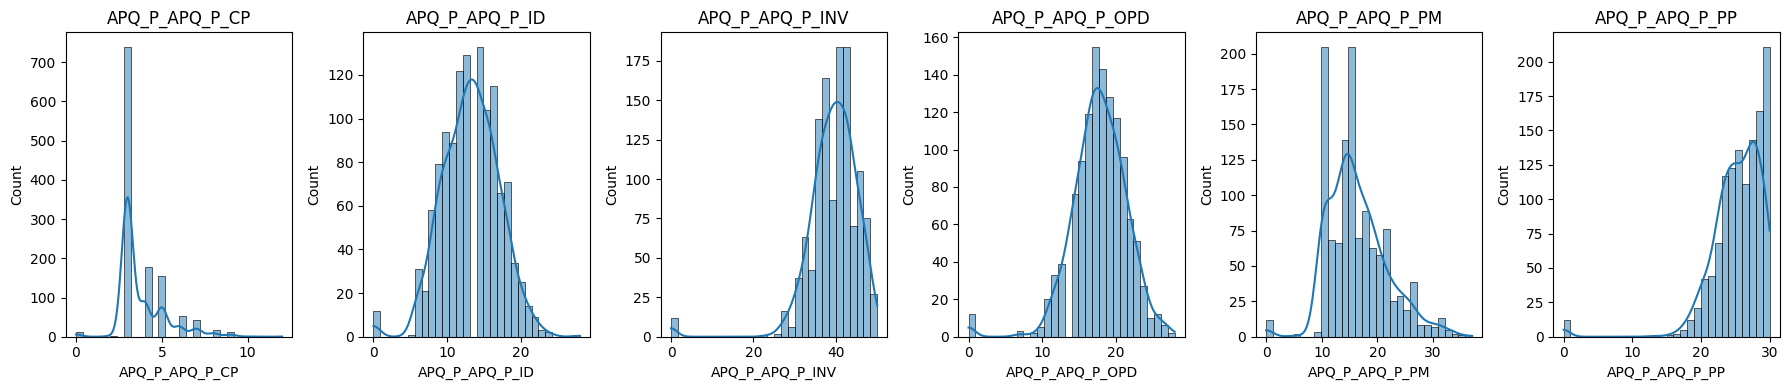

In [13]:
# Distribution of APQ Plots
features = ['APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP']

fig, axes = plt.subplots(1, 6, figsize=(18, 4)) 

# Plot histograms for each feature
for i, feature in enumerate(features):
    sns.histplot(data_quant[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout() 
plt.show()

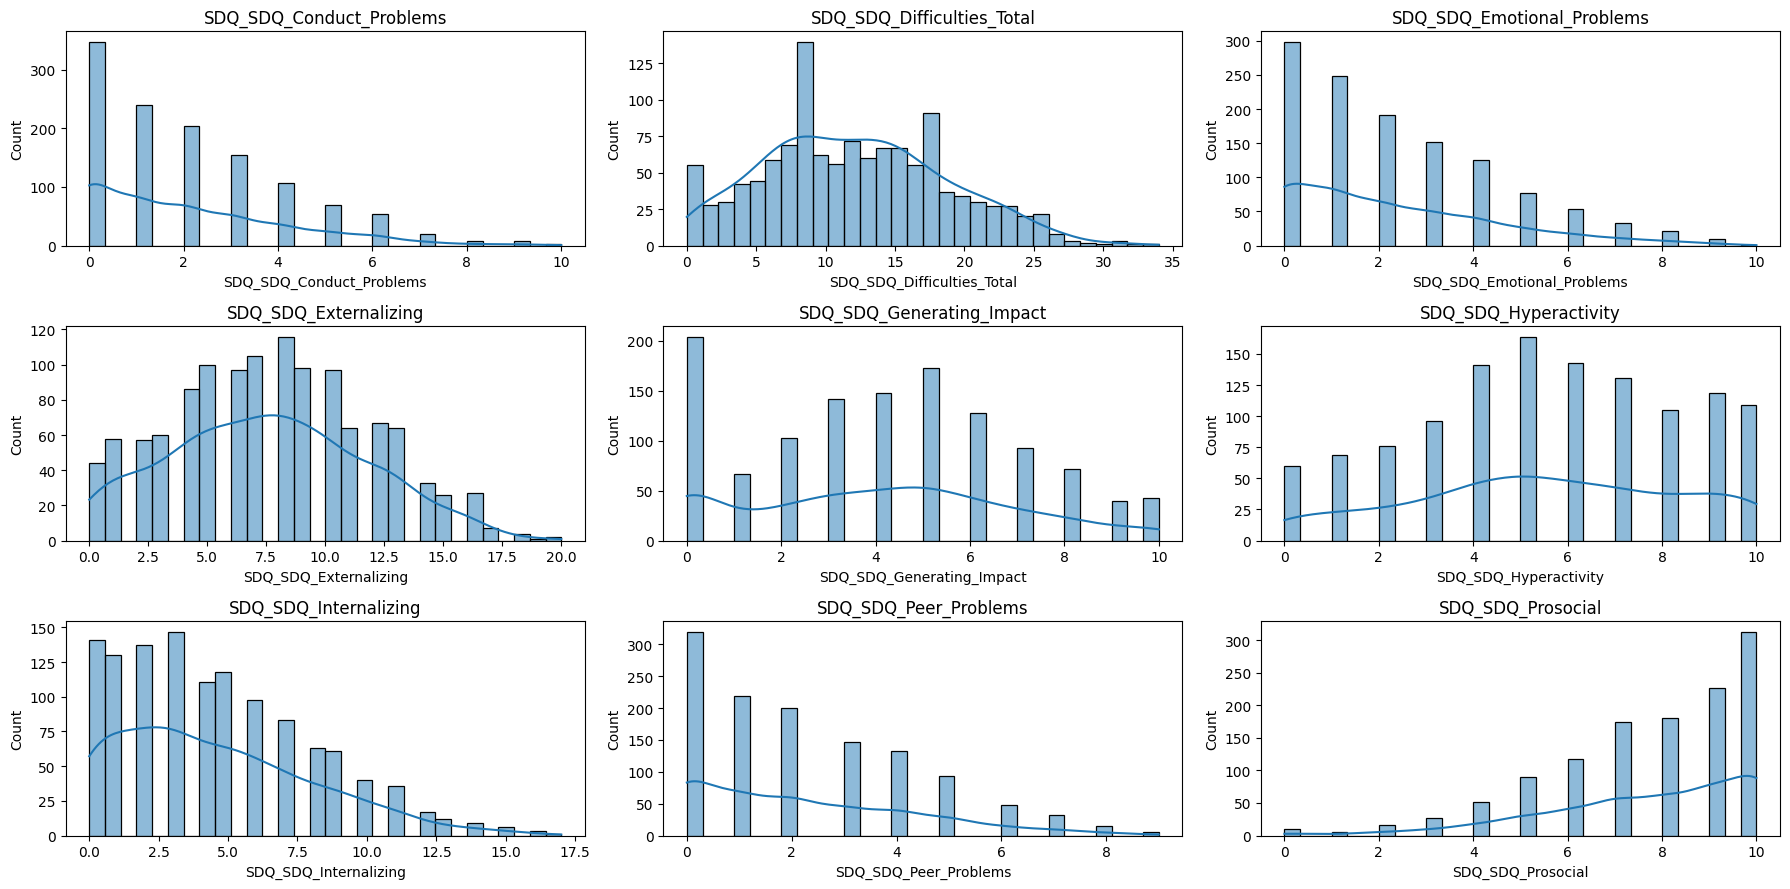

In [14]:
# Distribution of APQ Plots
features = ['SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity','SDQ_SDQ_Internalizing','SDQ_SDQ_Peer_Problems','SDQ_SDQ_Prosocial']

fig, axes = plt.subplots(3, 3, figsize=(18, 9)) 

# Plot histograms for each feature
for i, feature in enumerate(features):
    row, col = divmod(i, 3)  # Convert index to row and column
    sns.histplot(data_quant[feature], bins=30, kde=True, ax=axes[row, col])
    axes[row, col].set_title(feature)

plt.tight_layout() 
plt.show()

<Axes: xlabel='MRI_Track_Age_at_Scan', ylabel='Count'>

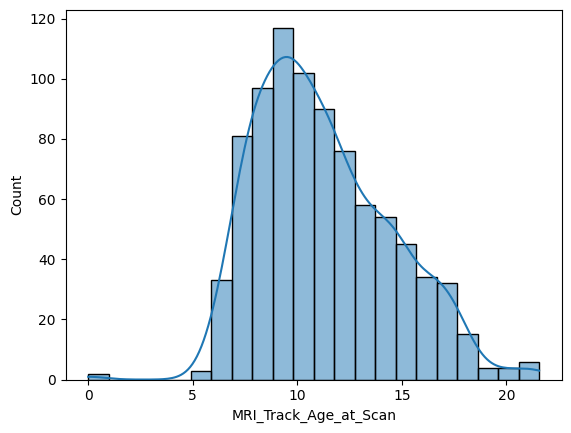

In [15]:
# Distribution of Age
sns.histplot(data_quant['MRI_Track_Age_at_Scan'], kde=True)

In [16]:
data_quant[data_quant['MRI_Track_Age_at_Scan'] == 0].size

38

In [17]:
# Coefficient of Variation
np.std(data_quant['MRI_Track_Age_at_Scan'])/np.mean(data_quant['MRI_Track_Age_at_Scan'])*100

28.744160203386087

- High variability in data
- We cannot impute the data with mean as the data has a high standard deviation and is not normally distributed 

In [18]:
# Target variables
data_ts = pd.read_excel("train/TRAINING_SOLUTIONS.xlsx",sheet_name="training_combined")
data_ts.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [19]:
# Target variables
data_cm = pd.read_excel("train/TRAIN_CATEGORICAL_METADATA.xlsx",sheet_name="training_combined")
data_cm.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [20]:
# Check for null values
data_cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB


In [21]:
# Mode Values of all the features
data_cm.drop(columns='participant_id').mode().iloc[0]

Basic_Demos_Enroll_Year             2018.0
Basic_Demos_Study_Site                 1.0
PreInt_Demos_Fam_Child_Ethnicity       0.0
PreInt_Demos_Fam_Child_Race            0.0
MRI_Track_Scan_Location                2.0
Barratt_Barratt_P1_Edu                21.0
Barratt_Barratt_P1_Occ                 0.0
Barratt_Barratt_P2_Edu                21.0
Barratt_Barratt_P2_Occ                 0.0
Name: 0, dtype: float64

<b> Multivariate Analysis </b>

In [22]:
# Merge Quant & TS datasets
data_quant_ts = pd.merge(data_quant, data_ts, on='participant_id', how='outer')
data_quant_ts.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,...,1,5,0,5,1,0,10,NaN,1,1
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,...,6,8,7,8,10,4,5,NaN,1,0
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,...,2,8,5,7,6,4,9,8.239904,1,0
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,...,4,16,9,10,8,4,6,NaN,1,1
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,...,4,11,4,10,7,3,9,8.940679,1,1


In [23]:
data_quant_ts.shape

(1213, 21)

Types of Correlation:

1) Pearson Correlation (default in df.corr())

- Measures linear relationships between variables.

- Ranges from -1 to 1:

- 1 → Perfect positive correlation

- -1 → Perfect negative correlation

- 0 → No correlation

- Works best with normally distributed numerical data.

2) Spearman Correlation (df.corr(method='spearman'))

- Measures monotonic relationships (i.e., as one variable increases, the other increases/decreases, but not necessarily at a constant rate).

- Useful for ordinal data or when the relationship is non-linear.

3) Kendall Tau Correlation (df.corr(method='kendall'))

- Measures the association between ranked variables.

- Best for small datasets or cases with many tied values.

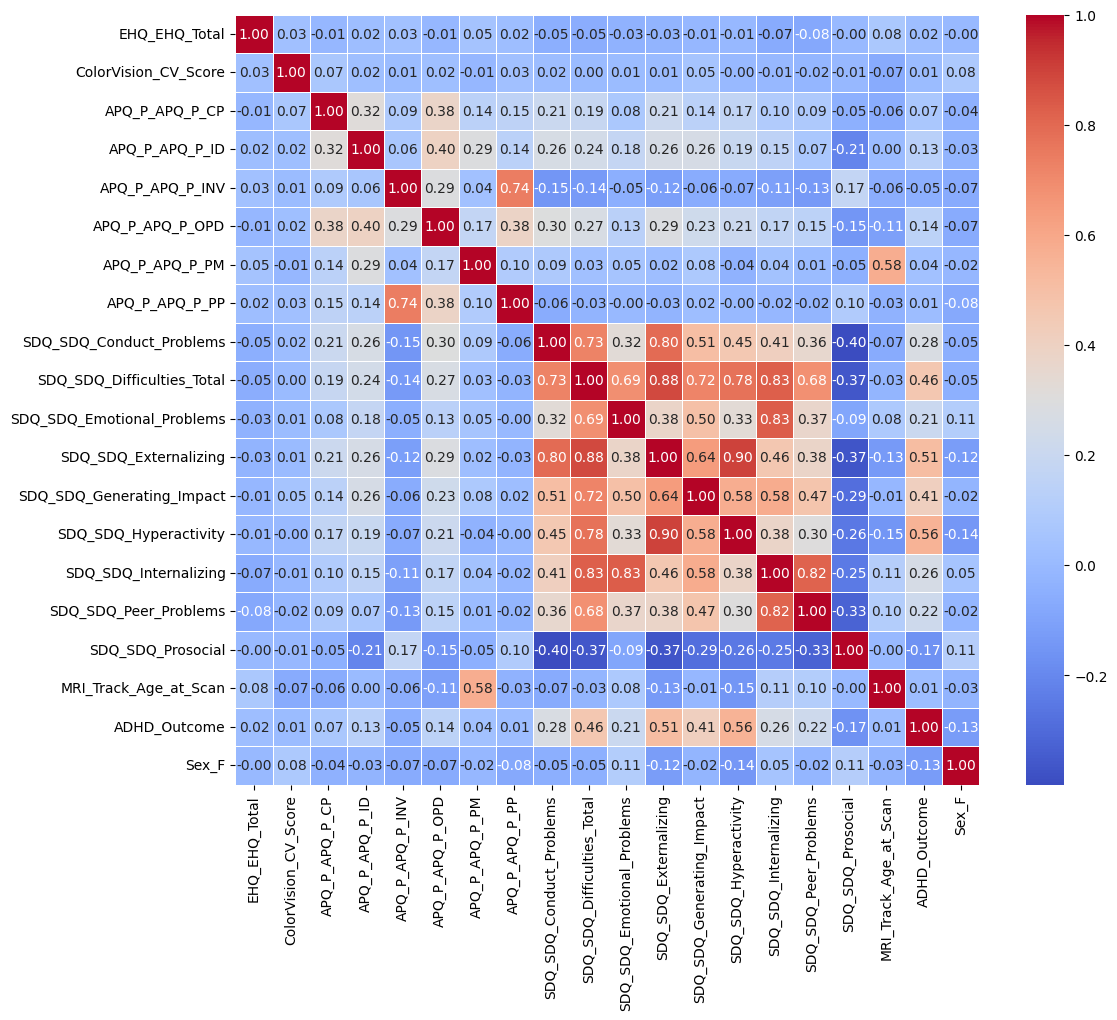

In [24]:
# Pairwise Correlation
corr_matrix = data_quant_ts.drop(columns='participant_id').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f",cmap="coolwarm", linewidths=0.5)
plt.show()

<b> Observations </b>

- Hyperactivity, Externalizing, Difficulties_total, Generating impact has a high correlation with ADHD

- As the age increases, poor monitoring/supervision score increases (high positive correlation)

- All the SDQ features are highly correlated with each other

- Features have a weak correlation with Sex_F

- Involvement (INV) score has ahigh correlation with positive parenting (PP) score

In [25]:
# Merge Quant & TS & CM datasets
data_quant_ts_cm = pd.merge(data_quant_ts, data_cm, on='participant_id', how='outer')
data_quant_ts_cm.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,Sex_F,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,...,1,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,...,0,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,...,0,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,...,1,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,...,1,2019,3,0.0,1,3,15,20,0,0


In [26]:
data_quant_ts_cm.shape

(1213, 30)

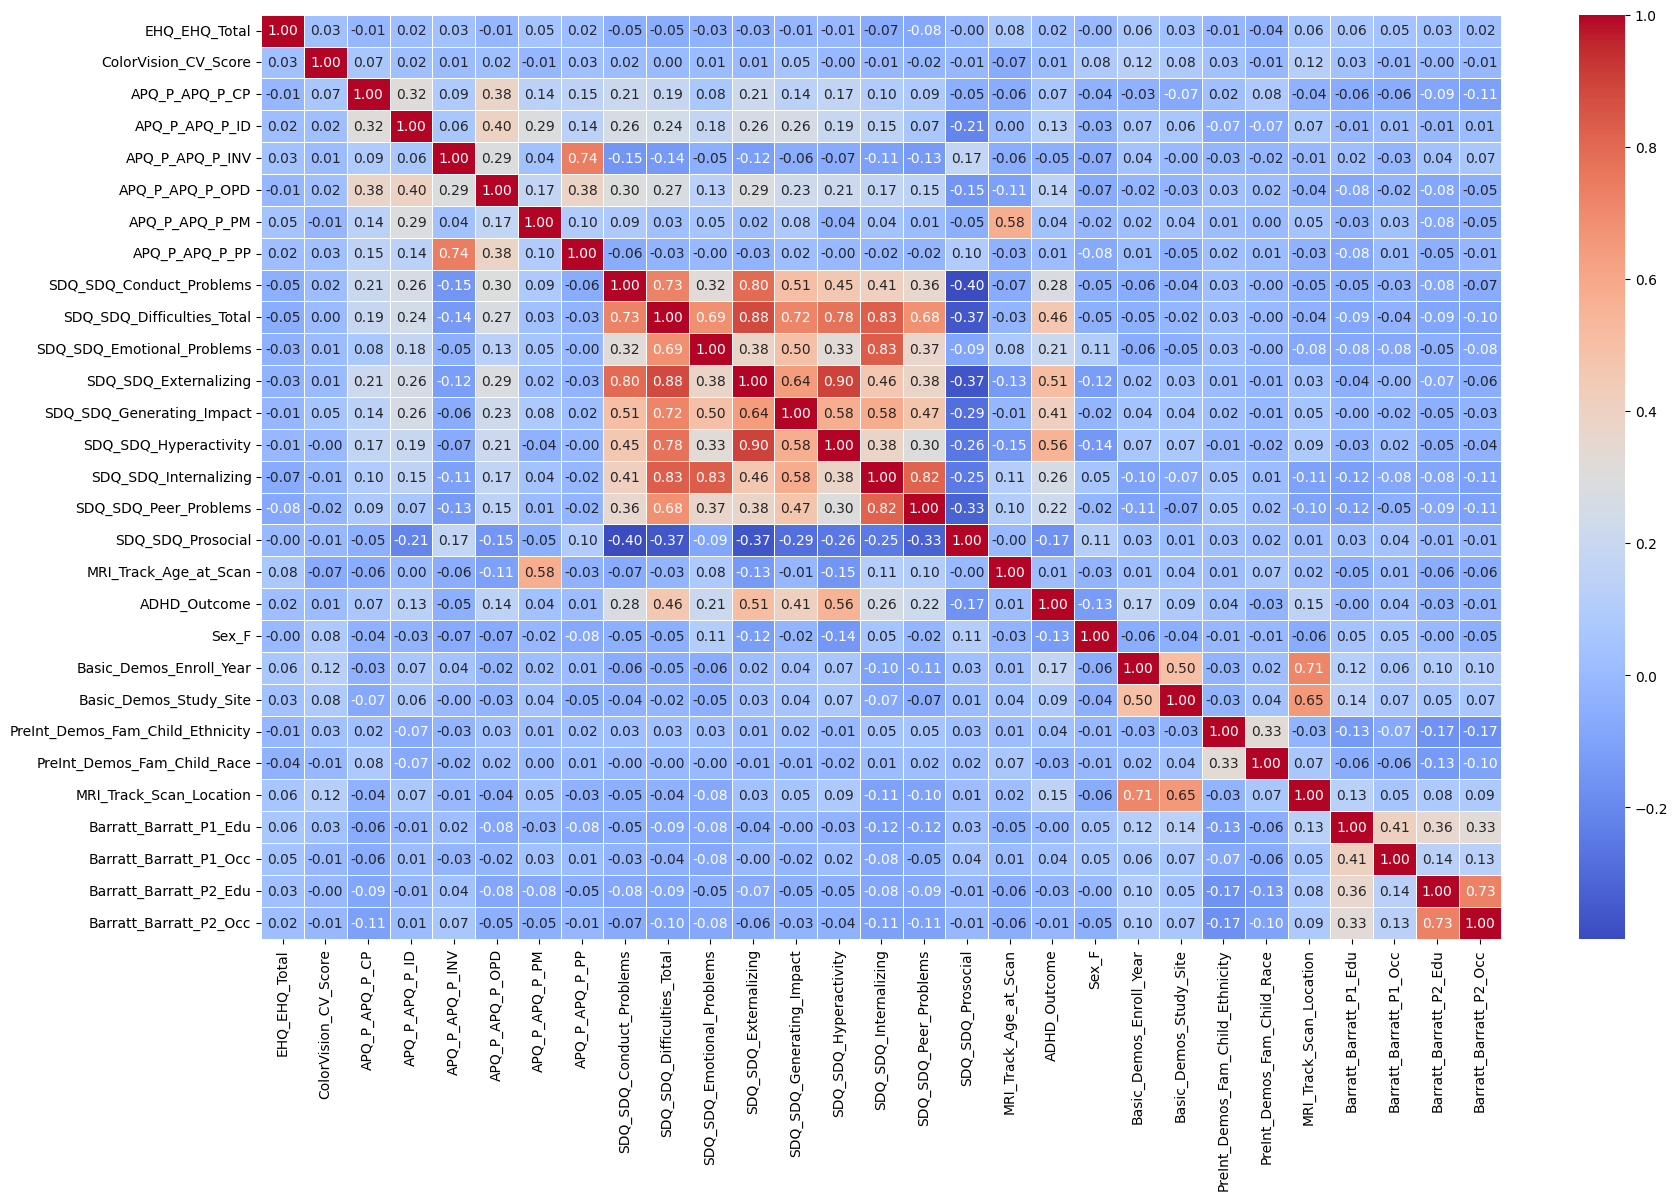

In [27]:
# Pairwise Correlation
corr_matrix = data_quant_ts_cm.drop(columns='participant_id').corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f",cmap="coolwarm", linewidths=0.5)
plt.show()

### Data Cleaning

#### Handling Missing Values

##### PreInt_Demos_Fam_Child_Ethnicity

In [28]:
# Fill with '2 - Decline to Specify'
data_quant_ts_cm['PreInt_Demos_Fam_Child_Ethnicity'] = data_quant_ts_cm['PreInt_Demos_Fam_Child_Ethnicity'].fillna(2)

In [29]:
data_quant_ts_cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   EHQ_EHQ_Total                     1213 non-null   float64
 2   ColorVision_CV_Score              1213 non-null   int64  
 3   APQ_P_APQ_P_CP                    1213 non-null   int64  
 4   APQ_P_APQ_P_ID                    1213 non-null   int64  
 5   APQ_P_APQ_P_INV                   1213 non-null   int64  
 6   APQ_P_APQ_P_OPD                   1213 non-null   int64  
 7   APQ_P_APQ_P_PM                    1213 non-null   int64  
 8   APQ_P_APQ_P_PP                    1213 non-null   int64  
 9   SDQ_SDQ_Conduct_Problems          1213 non-null   int64  
 10  SDQ_SDQ_Difficulties_Total        1213 non-null   int64  
 11  SDQ_SDQ_Emotional_Problems        1213 non-null   int64  
 12  SDQ_SD

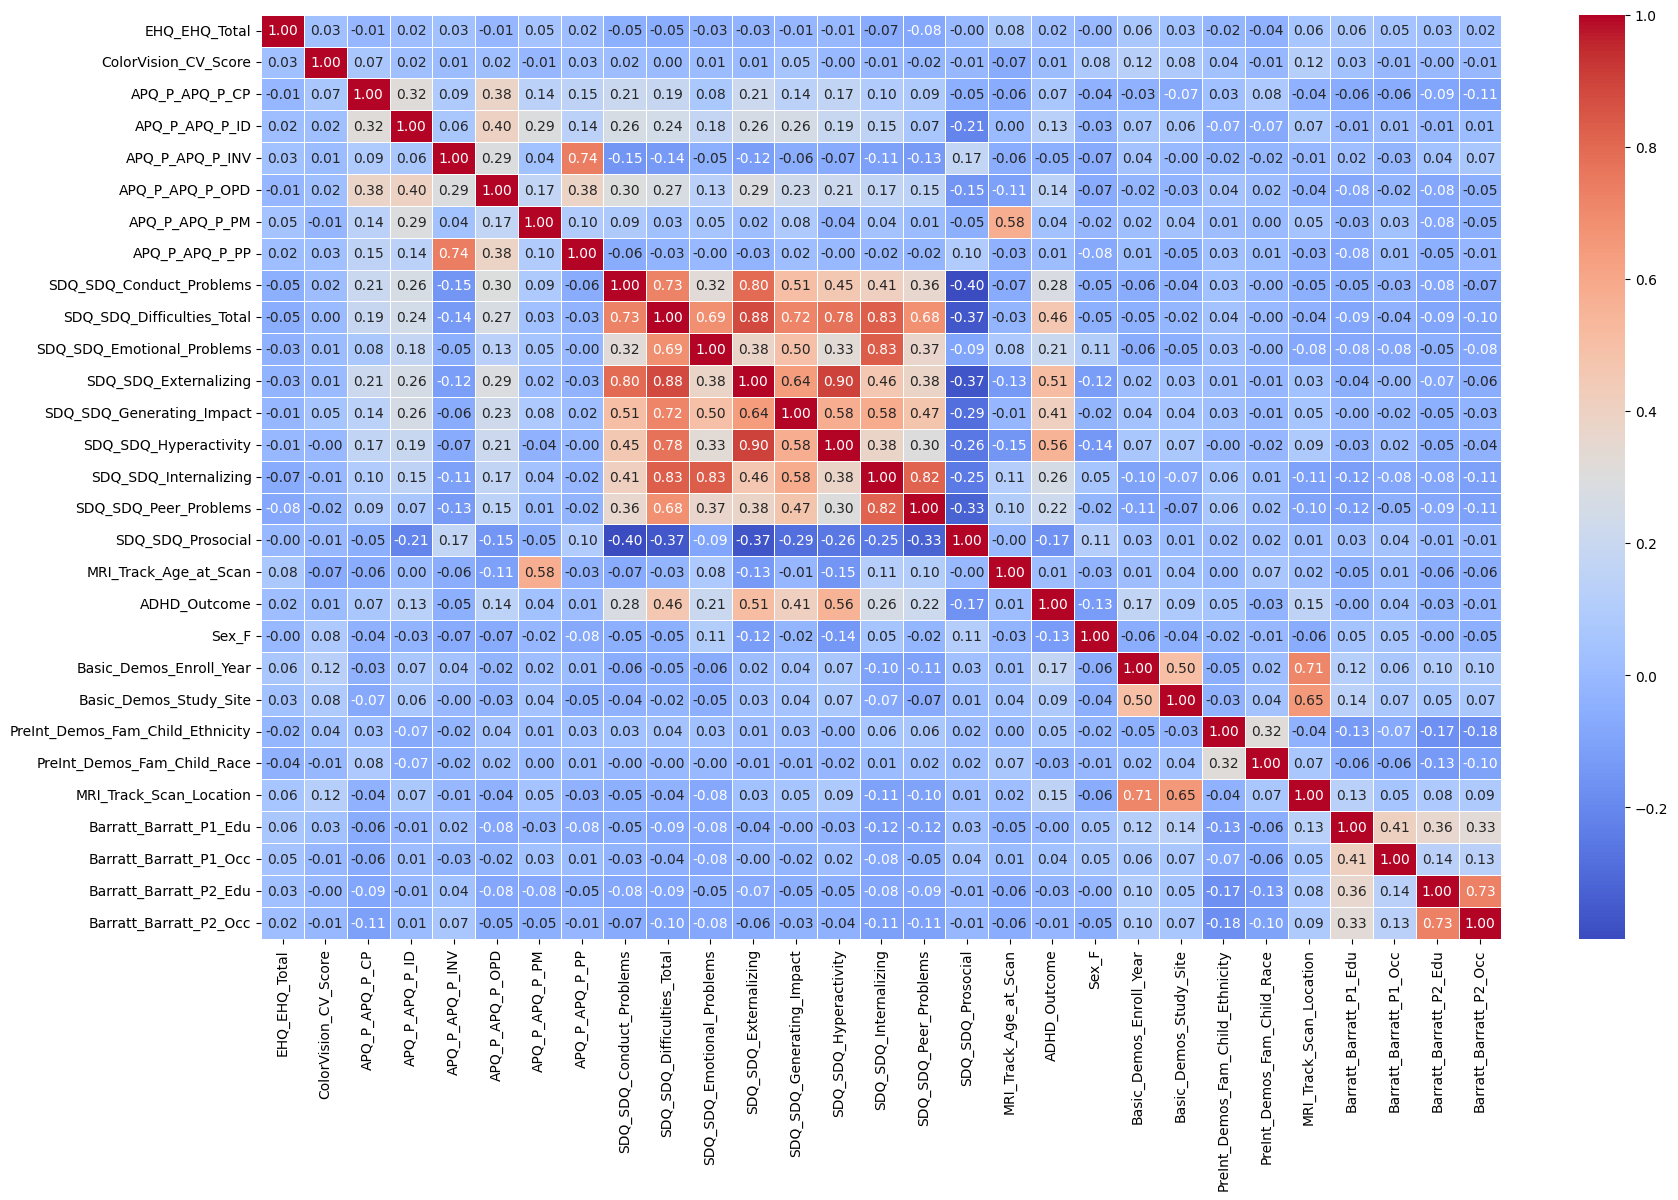

In [30]:
# Correlation
corr_matrix = data_quant_ts_cm.drop(columns='participant_id').corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f",cmap="coolwarm", linewidths=0.5)
plt.show()

##### MRI_Track_Age_at_Scan

In [31]:
# Distribution of 'MRI_Track_Age_at_Scan' before imputation
data_quant['MRI_Track_Age_at_Scan'].describe()

count    853.000000
mean      11.245678
std        3.234372
min        0.000000
25%        8.803901
50%       10.739219
75%       13.460871
max       21.564453
Name: MRI_Track_Age_at_Scan, dtype: float64

<Axes: xlabel='MRI_Track_Age_at_Scan', ylabel='Count'>

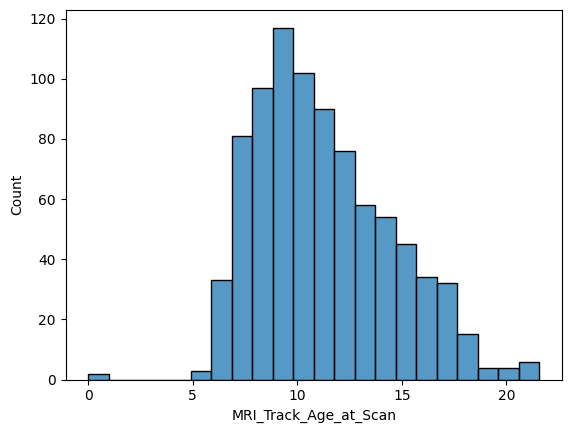

In [32]:
sns.histplot(data_quant['MRI_Track_Age_at_Scan'])

- Imputing missing values in MRI_Track_Age_at_Scan using the KNN Imputation
- Missing values will be filled using the 5 nearest neighbors in APQ_P_APQ_P_PM

In [33]:
"""
# Initialize KNN Imputer with 5 nearest neighbors
imputer = KNNImputer(n_neighbors=5)

# Apply imputer only on the 'f2' column using 'f1' as reference
data_quant_ts_cm[['MRI_Track_Age_at_Scan']] = imputer.fit_transform(data_quant_ts_cm[['MRI_Track_Age_at_Scan', 'APQ_P_APQ_P_PM']])[:, 0].reshape(-1, 1)

# Check for null values
print(data_quant_ts_cm['MRI_Track_Age_at_Scan'].isnull().sum())

print(data_quant_ts_cm['MRI_Track_Age_at_Scan'].describe())

sns.histplot(data_quant_ts_cm['MRI_Track_Age_at_Scan'])
"""

"\n# Initialize KNN Imputer with 5 nearest neighbors\nimputer = KNNImputer(n_neighbors=5)\n\n# Apply imputer only on the 'f2' column using 'f1' as reference\ndata_quant_ts_cm[['MRI_Track_Age_at_Scan']] = imputer.fit_transform(data_quant_ts_cm[['MRI_Track_Age_at_Scan', 'APQ_P_APQ_P_PM']])[:, 0].reshape(-1, 1)\n\n# Check for null values\nprint(data_quant_ts_cm['MRI_Track_Age_at_Scan'].isnull().sum())\n\nprint(data_quant_ts_cm['MRI_Track_Age_at_Scan'].describe())\n\nsns.histplot(data_quant_ts_cm['MRI_Track_Age_at_Scan'])\n"

<b> Regression over KNN for Imputation </b>
1. KNN struggles with distance calculations in high dimensions.
2. KNN is slow due to comparing all data points.
3. Data sparsity makes it hard for KNN to find good neighbors.
4. Regression learns patterns instead of just relying on neighbors.
5. Regression handles many features more efficiently.
6. Regression provides more accurate imputation.

Imputation using 'Median' and how does it change the distribution

In [34]:
# And, if we impute with the median value
data_quant_copy1 = data_quant.copy()

# Initialize SimpleImputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# Apply imputation
data_quant_copy1['MRI_Track_Age_at_Scan'] = imputer.fit_transform(data_quant_copy1[['MRI_Track_Age_at_Scan']])

In [35]:
data_quant_copy1['MRI_Track_Age_at_Scan'].describe()

count    1213.000000
mean       11.095369
std         2.721666
min         0.000000
25%         9.583960
50%        10.739219
75%        11.966005
max        21.564453
Name: MRI_Track_Age_at_Scan, dtype: float64

<Axes: xlabel='MRI_Track_Age_at_Scan', ylabel='Count'>

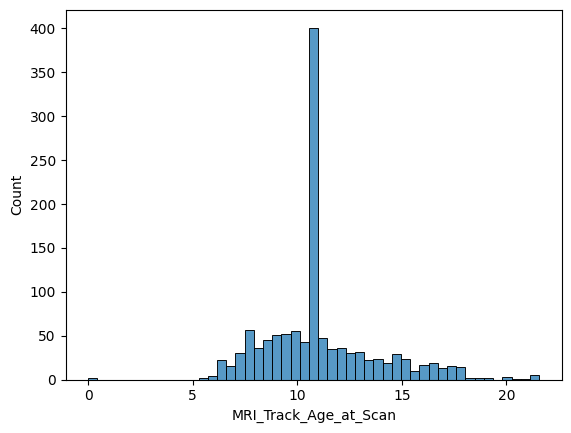

In [36]:
sns.histplot(data_quant_copy1['MRI_Track_Age_at_Scan'])

Imputation using 'Mean' and how does it change the distribution

In [37]:
# And, if we impute with the median value
data_quant_copy2 = data_quant.copy()

# Initialize SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Apply imputation
data_quant_copy2['MRI_Track_Age_at_Scan'] = imputer.fit_transform(data_quant_copy2[['MRI_Track_Age_at_Scan']])

In [38]:
data_quant_copy2['MRI_Track_Age_at_Scan'].describe()

count    1213.000000
mean       11.245678
std         2.711805
min         0.000000
25%         9.583960
50%        11.245678
75%        11.966005
max        21.564453
Name: MRI_Track_Age_at_Scan, dtype: float64

<Axes: xlabel='MRI_Track_Age_at_Scan', ylabel='Count'>

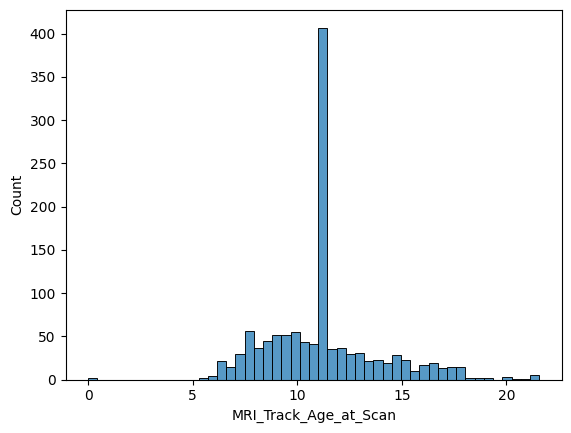

In [39]:
sns.histplot(data_quant_copy2['MRI_Track_Age_at_Scan'])

##### Imputation using Random Forest Regressor

In [85]:
data_tfcm_age = data_tfcm.merge(data_quant[['participant_id', 'MRI_Track_Age_at_Scan']], on='participant_id', how='left')
data_tfcm_age.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,MRI_Track_Age_at_Scan
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372,11.889002
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200,7.670088
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162,7.743896
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584,NaN
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269,NaN


Training the model and validating it using the holdout set

In [86]:
# Subset containing only Non-Null values for 'Age'
known_values = data_tfcm_age.dropna(subset=['MRI_Track_Age_at_Scan'])
known_values.shape

(853, 19902)

In [87]:
X = known_values.drop(columns=['MRI_Track_Age_at_Scan', 'participant_id'])
y = known_values['MRI_Track_Age_at_Scan']

Seelcting top 100 most correlated features to reduce dimensionality of our dataset

In [72]:
# Select top 100 most correlated features
selector = SelectKBest(score_func=f_regression, k=100)
X_selected = selector.fit_transform(X, y)

In [73]:
# Holdout 20% of Known Values
known_values_20_perc = known_values.sample(frac=0.2, random_state=40)
known_values_20_perc.shape

(171, 19902)

In [74]:
# Create a copy of the subset having non-null values for 'Age'
data_temp = known_values.copy()

In [75]:
# Simulating missing values
data_temp.loc[known_values_20_perc.index, 'MRI_Track_Age_at_Scan'] = np.nan

In [76]:
# Preparing train data (known values) on Reduced Features
train_data = data_temp.dropna(subset=['MRI_Track_Age_at_Scan'])
X_train = selector.transform(train_data.drop(columns=['participant_id', 'MRI_Track_Age_at_Scan']))
y_train = train_data['MRI_Track_Age_at_Scan']

In [77]:
# Prepare test data (where Age is missing) on Reduced Features
missing_data = data_temp[data_temp['MRI_Track_Age_at_Scan'].isna()]
X_test = selector.transform(missing_data.drop(columns=['participant_id', 'MRI_Track_Age_at_Scan']))

In [78]:
# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [79]:
# Predict Missing Values
data_temp.loc[data_temp['MRI_Track_Age_at_Scan'].isna(), 'MRI_Track_Age_at_Scan'] = rf.predict(X_test)

In [80]:
# Validate with RMSE
rmse = np.sqrt(mean_squared_error(known_values_20_perc['MRI_Track_Age_at_Scan'], data_temp.loc[known_values_20_perc.index, 'MRI_Track_Age_at_Scan']))
print(f"RMSE of imputation: {rmse:.2f}")

RMSE of imputation: 2.70


<font color='red'> When I selected 100 best features that are highly correlated with our target variable (dimensionality reduction), RMSE was 2.70. However, when I selected 19900 features (all of them), RMSE was 2.82.</font>

<font color='red'>The independent features (fMRI connectome) are highly correlated and that is why we will use either PCA or lasso regression for dimensionality reduction. </font>

In [91]:
# Apply Lasso with cross-validation to find the best alpha (regularization strength) (alternative to the selector used earlier)
lasso = LassoCV(cv=5, random_state=42) #Performs Lasso regression with 5-fold cross-validation to find the best alpha (penalty parameter)
lasso.fit(X, y)

# Get selected features (non-zero coefficients)
selected_features_names = X.columns[lasso.coef_ != 0]  # Get feature names
X_selected = X[selected_features_names]  # Select only important features

# Print how many features were selected
print(f"Number of selected features: {len(selected_features)}")

Number of selected features: 493


In [92]:
# Holdout 20% of Known Values
known_values_20_perc = known_values.sample(frac=0.2, random_state=40)
known_values_20_perc.shape

# Create a copy of the subset having non-null values for 'Age'
data_temp = known_values.copy()

# Simulating missing values
data_temp.loc[known_values_20_perc.index, 'MRI_Track_Age_at_Scan'] = np.nan

In [94]:
# Preparing train data (known values) on Reduced Features
train_data = data_temp.dropna(subset=['MRI_Track_Age_at_Scan'])
X_train_full = train_data.drop(columns=['participant_id', 'MRI_Track_Age_at_Scan'])

# Select the same features as identified by Lasso
X_train = X_train_full.iloc[:, selected_features]
y_train = train_data['MRI_Track_Age_at_Scan']

print(f"Shape of X_train after feature selection: {X_train.shape}")

Shape of X_train after feature selection: (682, 493)


In [95]:
# Prepare test data (where Age is missing) on Reduced Features
missing_data = data_temp[data_temp['MRI_Track_Age_at_Scan'].isna()]
X_test_full = missing_data.drop(columns=['participant_id', 'MRI_Track_Age_at_Scan'])

X_test = X_test_full.iloc[:, selected_features]

In [96]:
# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [97]:
# Predict Missing Values
data_temp.loc[data_temp['MRI_Track_Age_at_Scan'].isna(), 'MRI_Track_Age_at_Scan'] = rf.predict(X_test)

In [98]:
# Validate with RMSE
rmse = np.sqrt(mean_squared_error(known_values_20_perc['MRI_Track_Age_at_Scan'], data_temp.loc[known_values_20_perc.index, 'MRI_Track_Age_at_Scan']))
print(f"RMSE of imputation: {rmse:.2f}")

RMSE of imputation: 2.79


In [105]:
# Impute missing values in the actual dataset - 'data_tfcm_age'

# Prepare test data (actual dataset where Age is missing)
X_actual_full = data_tfcm_age.drop(columns=['participant_id', 'MRI_Track_Age_at_Scan'])
X_actual = X_actual_full[selected_features_names]

In [106]:
# Identify missing values in actual dataset
missing_indices = data_tfcm_age['MRI_Track_Age_at_Scan'].isna()

In [107]:
# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X,y) #This was defined earlier

KeyboardInterrupt: 

In [101]:
# Predict missing values using trained Random Forest model
data_tfcm_age.loc[missing_indices, 'MRI_Track_Age_at_Scan'] = rf.predict(X_actual[missing_indices])
print(f"Number of missing values imputed: {missing_indices.sum()}")

Number of missing values imputed: 360


Make one training dataset to use for model building

In [108]:
data_quant_ts_cm = data_quant_ts_cm.drop(columns=['MRI_Track_Age_at_Scan'])

In [109]:
data_tfcm_quant_ts_cm = pd.merge(data_tfcm_age, data_quant_ts_cm, on='participant_id', how='outer')
data_tfcm_quant_ts_cm.shape

(1213, 19930)

In [115]:
data_tfcm_quant_ts_cm['MRI_Track_Age_at_Scan'].isna().sum()

0

In [116]:
data_tfcm_quant_ts_cm.to_csv("train_data_final1.csv", index=False)